In [45]:
from Dataset1_2a import plot_graph_a, plot_graph_b, scalar_encoding, lin_regress
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import re
from math import *

data = pd.read_csv("insurance_data.csv")
ft6 = {'southwest' :1, 'southeast' :2, 'northwest' :3, 'northeast' :4}
ft5 = {'yes' :1, 'no' :2}
ft4 = {'female' :1, 'male' :2}

strip_data = data[['ft1','ft2','ft3','ft4','ft5','ft6','charges']].values
print strip_data

[[19 27.9 0 ... 'yes' 'southwest' 16884.924]
 [18 33.77 1 ... 'no' 'southeast' 1725.5523]
 [28 33.0 3 ... 'no' 'southeast' 4449.462]
 ...
 [18 36.85 0 ... 'no' 'southeast' 1629.8335]
 [21 25.8 0 ... 'no' 'southwest' 2007.945]
 [61 29.07 0 ... 'yes' 'northwest' 29141.3603]]


In [14]:
scal_str = []
for a,b,c,d,e,f,g in strip_data:
    scal_str.append([a, b, c, ft4[d], ft5[e],ft6[f], g])
    
scal_str = np.array(scal_str)
print scal_str

[[1.90000000e+01 2.79000000e+01 0.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.68849240e+04]
 [1.80000000e+01 3.37700000e+01 1.00000000e+00 ... 2.00000000e+00
  2.00000000e+00 1.72555230e+03]
 [2.80000000e+01 3.30000000e+01 3.00000000e+00 ... 2.00000000e+00
  2.00000000e+00 4.44946200e+03]
 ...
 [1.80000000e+01 3.68500000e+01 0.00000000e+00 ... 2.00000000e+00
  2.00000000e+00 1.62983350e+03]
 [2.10000000e+01 2.58000000e+01 0.00000000e+00 ... 2.00000000e+00
  1.00000000e+00 2.00794500e+03]
 [6.10000000e+01 2.90700000e+01 0.00000000e+00 ... 1.00000000e+00
  3.00000000e+00 2.91413603e+04]]


In [18]:
scal_data = np.array(scal_str)
One_HOT = np.array([])

# we do One-Hot Feature Encoding and no scalarization
for i in range(3,6):
    enc = LabelBinarizer()
    scal_data1 = enc.fit_transform(scal_data[:,i])
    if One_HOT.size == 0:
        One_HOT = scal_data1
    else:
        One_HOT = np.concatenate((One_HOT, scal_data1), axis = 1)
One_HOT_log = np.concatenate((scal_data[:,:3], One_HOT, strip_data[:,-1].reshape(-1,1)), axis = 1)
print One_HOT_log

[[19.0 27.9 0.0 ... 0 0 16884.924]
 [18.0 33.77 1.0 ... 0 0 1725.5523]
 [28.0 33.0 3.0 ... 0 0 4449.462]
 ...
 [18.0 36.85 0.0 ... 0 0 1629.8335]
 [21.0 25.8 0.0 ... 0 0 2007.945]
 [61.0 29.07 0.0 ... 1 0 29141.3603]]


Fold	Train RMSE	Pred. RMSE
1	6045.6302		6037.7210
2	6071.0807		5812.5134
3	6094.9356		5593.3654
4	6009.8733		6340.4202
5	5907.2373		7175.3768
6	6033.3378		6139.6223
7	6114.8885		5378.6365
8	5953.4717		6813.8346
9	6090.1992		5587.8043
10	6064.2619		5837.1059

Avg. RMSE Training: 6038.49161605
Avg. RMSE Test: 6071.64002797



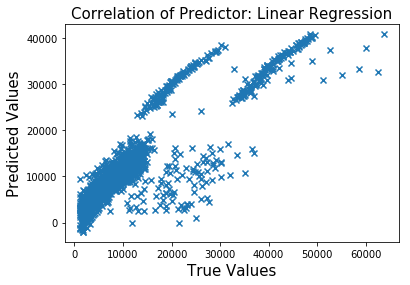

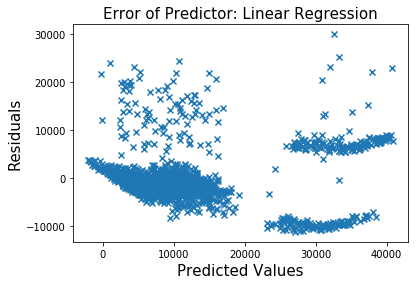

In [21]:
lin_regress(One_HOT_log)

In [66]:
# Performing the Log now
One_Hot_log_real = np.concatenate((One_HOT_log[:,:-1], \
                                  np.log(One_HOT_log[:,-1].tolist()).reshape(-1,1)), axis = 1)
print One_Hot_log_real

(1338,)
(1338, 9)
[[19.0 27.9 0.0 ... 0 0 9.734176431773115]
 [18.0 33.77 1.0 ... 0 0 7.453302452133774]
 [28.0 33.0 3.0 ... 0 0 8.400538468975023]
 ...
 [18.0 36.85 0.0 ... 0 0 7.39623314134416]
 [21.0 25.8 0.0 ... 0 0 7.604867089998248]
 [61.0 29.07 0.0 ... 1 0 10.279913760197052]]


In [67]:
kf = KFold(n_splits=10, shuffle = True)
n = 1

net_RMSE_trn = 0.0
net_RMSE_test = 0.0

print "Fold\tTrain RMSE\tPred. RMSE"
for train_index, test_index in kf.split(One_Hot_log_real):
    X_train = One_Hot_log_real[train_index]
    X_test = One_Hot_log_real[test_index]
    
    X_train1 = One_HOT_log[train_index]
    X_test1 = One_HOT_log[test_index]
    
    reg = LinearRegression().fit(X_train[:,:-1], X_train[:,-1])
    
    
    print np.exp(reg.predict(X_train[:,:-1].tolist()).reshape(-1,1)).shape
    
    rmse_trn = sqrt(mean_squared_error(X_train1[:,-1], \
                                       np.exp(reg.predict(X_train[:,:-1].tolist()).reshape(-1,1))))
    rmse_pred = sqrt(mean_squared_error(X_test1[:,-1], \
                                        np.exp(reg.predict(X_test[:,:-1].tolist()).reshape(-1,1))))

    net_RMSE_test = rmse_pred + net_RMSE_test
    net_RMSE_trn = rmse_trn + net_RMSE_trn

    print str(n) + "\t" + ("%.4f" % rmse_trn) + "\t\t" + ("%.4f" % rmse_pred)
    n = n + 1
print 
print "Avg. RMSE Training: " + str(net_RMSE_trn/10.0)
print "Avg. RMSE Test: " + str(net_RMSE_test/10.0)
# This linear regression has no hyperparameters to tune in cross validation
print
reg_fin = LinearRegression().fit(One_Hot_log_real[:,:-1], One_Hot_log_real[:,-1])
pred = reg_fin.predict(One_Hot_log_real[:,:-1])

Fold	Train RMSE	Pred. RMSE
(1204, 1)
1	8332.7274		7301.3517
(1204, 1)
2	8468.9565		6934.8169
(1204, 1)
3	8417.4895		10002.5258
(1204, 1)
4	8407.4267		9219.1079
(1204, 1)
5	8285.5645		9029.1495
(1204, 1)
6	8247.5256		7856.5155
(1204, 1)
7	8358.4507		8225.4360
(1204, 1)
8	8277.0057		9446.0271
(1205, 1)
9	8324.3813		8932.0650
(1205, 1)
10	8499.4320		6747.5191

Avg. RMSE Training: 8361.89597473
Avg. RMSE Test: 8369.45145242



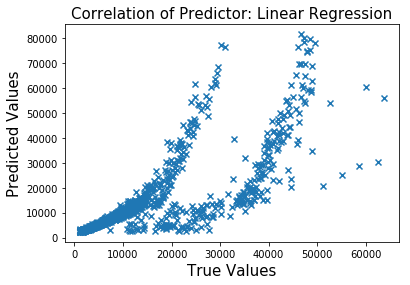

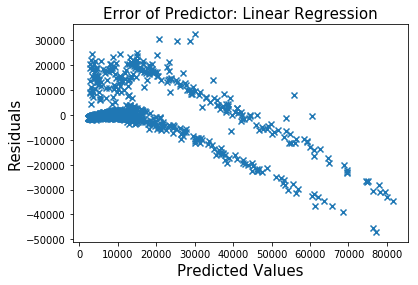

In [68]:
plot_graph_a(One_HOT_log[:,-1], np.exp(pred), "Linear Regression")
plot_graph_b(np.exp(pred), (One_HOT_log[:,-1] - np.exp(pred)), "Linear Regression")

In [57]:
print np.exp([5.0,3.0])

[148.4131591   20.08553692]
